In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data=pd.read_csv(r"/content/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [8]:
x.drop(["Geography","Gender"],axis=1,inplace=True)

In [9]:
x = pd.concat([x,geography,gender],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scales=sc.fit_transform(xtrain)
x_test_scaled=sc.transform(xtest)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [13]:
classifier=Sequential()

In [14]:
#adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [15]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [16]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [18]:
# adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
classifier.compile(optimizer= opt,loss= 'binary_crossentropy',metrics=['accuracy'])


In [25]:
#initialzing the learning rate
import tensorflow as tf
opt= tf.keras.optimizers.Adam(learning_rate=0.01)

In [41]:
# initialize early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [42]:
model_history=classifier.fit(xtrain,ytrain,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8001 - loss: 0.5008 - val_accuracy: 0.7955 - val_loss: 0.5081
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7950 - loss: 0.5079 - val_accuracy: 0.7955 - val_loss: 0.5066
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8012 - loss: 0.4992 - val_accuracy: 0.7955 - val_loss: 0.5066
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7978 - loss: 0.5038 - val_accuracy: 0.7955 - val_loss: 0.5067
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7947 - loss: 0.5085 - val_accuracy: 0.7955 - val_loss: 0.5066
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7952 - loss: 0.5069 - val_accuracy: 0.7955 - val_loss: 0.5067
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7890 - loss: 0.5155 - val_accuracy: 0.7955 - val_loss: 0.5067
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8009 - loss: 0.4994 - 

In [43]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

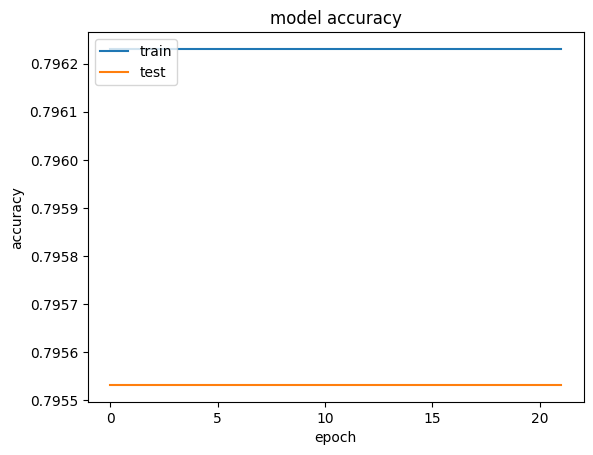

In [46]:
# plot graph for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


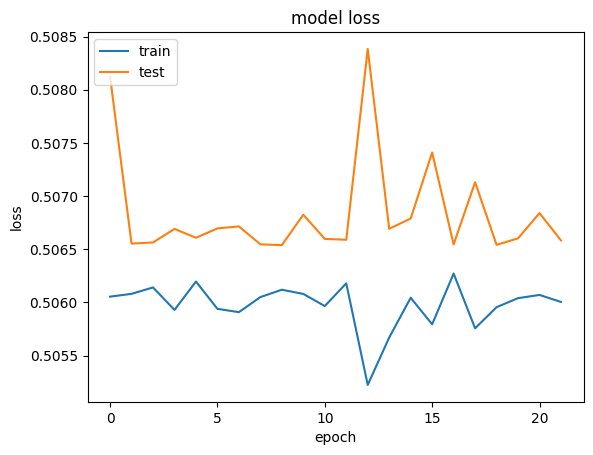

In [45]:
# plot graph for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [47]:
# predictions
y_pred=classifier.predict(xtest)
y_pred=(y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [48]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [49]:
#Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,y_pred)
score

0.7975

In [50]:
#checking weights
classifier.get_weights()

[array([[ 0.44997305,  0.51499987, -0.04107946, -0.2021972 , -0.14657134,
          0.45059216,  0.31311727, -0.16259497, -0.49644965, -0.43365687,
         -0.42993468],
        [-0.37278515,  0.33938527,  0.3294111 ,  0.10432011,  0.37816614,
         -0.27063313,  0.3223404 ,  0.61372054, -0.09302891, -0.20586976,
         -0.38366103],
        [-0.31024837,  0.44255283, -0.06837669,  0.2334196 , -0.08040884,
          0.04675004,  0.02306551,  0.05111468, -0.40252972,  0.47464073,
          0.09821182],
        [ 0.27271444, -0.16981661, -0.12845016,  0.5193327 ,  0.13782912,
          0.0247196 ,  0.24486142,  0.00740361, -0.05204046, -0.51356107,
          0.29307747],
        [ 0.29258853,  0.01596064,  0.2688229 ,  0.37300593,  0.09118801,
          0.48705548,  0.08967471, -0.30455643,  0.33711082,  0.12413263,
         -0.07779327],
        [ 0.3708731 , -0.31312847, -0.0299255 ,  0.40291935,  0.08051229,
         -0.3442115 ,  0.3047269 ,  0.03894755,  0.16838194,  0.1299350